# 2.7 Assignation table

In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame

In [11]:
address = 'C:/Users/Moanesga/Desktop/Data/Project Table/1985_to_1991.csv'
Assign = pd.read_csv(address,delimiter= ';')
Assign.columns = ['Quarter','no_projects','id','Project_Name','OEM','engine_type','Duration ',
                  'KPI','Category','Title','hires','Category_c']
Assign.head(5)

,Quarter,no_projects,id,Project_Name,OEM,engine_type,Duration,KPI,Category,Title,hires,Category_c
0,Q3 1985,1,139,Subaru_OHCF_85,subaru,ohcf,12.010959,5.76,L,Assistant Engineer,344.727273,1
1,Q3 1985,1,139,Subaru_OHCF_85,subaru,ohcf,12.010959,5.76,L,Engineer,2353.454545,1
2,Q3 1985,1,139,Subaru_OHCF_85,subaru,ohcf,12.010959,5.76,L,Manager_new,3.272727,1
3,Q3 1985,1,139,Subaru_OHCF_85,subaru,ohcf,12.010959,5.76,L,Senior Engineer,667.272727,1
4,Q3 1985,1,139,Subaru_OHCF_85,subaru,ohcf,12.010959,5.76,L,Senior Staff,605.454545,1


In [20]:
#codified with dummies variables OEM, engine_type and title -> 42 columns
address_1 = 'C:/Users/Moanesga/Desktop/Data/Project Table/1985_to_1991_2.csv'
ds = pd.read_csv(address_1,delimiter= ';')
ds.head(5)

,Quarter,Q,dd.mm.,year,date,date_,no_projects,Duration,KPI,Category_c,...,dohcv,l,Assistant Engineer,Engineer,Manager_new,Senior Engineer,Senior Staff,Staff,Technique Leader,hires
0,Q3 1985,Q3,30.09.,1985,30.09.1985,30.09.1985,1,12.0,5.76,1,...,0,0,1,0,0,0,0,0,0,344.727273
1,Q3 1985,Q3,30.09.,1985,30.09.1985,30.09.1985,1,12.0,5.76,1,...,0,0,0,1,0,0,0,0,0,2353.454545
2,Q3 1985,Q3,30.09.,1985,30.09.1985,30.09.1985,1,12.0,5.76,1,...,0,0,0,0,1,0,0,0,0,3.272727
3,Q3 1985,Q3,30.09.,1985,30.09.1985,30.09.1985,1,12.0,5.76,1,...,0,0,0,0,0,1,0,0,0,667.272727
4,Q3 1985,Q3,30.09.,1985,30.09.1985,30.09.1985,1,12.0,5.76,1,...,0,0,0,0,0,0,1,0,0,605.454545


In [23]:
ds_1 = ds.filter(['date','no_projects'],axis=1)
ds_1['date'] = pd.to_datetime(ds_1['date'])
ds_2 = ds_1.set_index(ds_1['date'])
ds_3 = ds_2.filter(['no_projects'], axis=1)
ds_3.head(5)

,no_projects
date,
1985-09-30,1
1985-09-30,1
1985-09-30,1
1985-09-30,1
1985-09-30,1


In [24]:
import scipy 
from scipy import stats

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
import statsmodels.tsa.stattools as ts

C:\Users\Moanesga\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


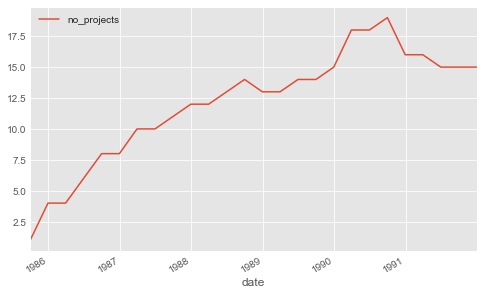

In [27]:
%matplotlib inline
rcParams['figure.figsize'] = 8, 5
plt.style.use('ggplot')
ds_3.plot()

In [34]:
#Calculating moving average 
ds_3['MA'] = pd.rolling_mean(ds_3['no_projects'],3)

C:\Users\Moanesga\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
  


In [41]:
ds['date'] = pd.to_datetime(ds['date'])
ds = ds.set_index(ds['date'])

In [43]:
#Linear regression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [92]:
#Partitioning 
# Split the data into training/testing sets
train = pd.DataFrame(ds.loc['1985-09-30':'1989-12-30'])
train_x = train.filter(['Duration','KPI','Category_c','alfa-romero',
                       'audi','bmw','chevrolet','dodge','honda',
                       'isuzu','jaguar','mazda','mercedes-benz',
                       'mercury','mitsubishi','nissan','peugot',
                       'plymouth','porsche','renault','saab',
                       'subaru','toyota','volkswagen','volvo',
                       'rotor','ohc','ohcf','ohcv','dohc','l',
                        'Assistant Engineer','Engineer','Manager_new',
                       'Senior Engineer','Senior Staff','Staff',
                       'Technique Leader','no_projects'])
test = pd.DataFrame(ds.loc['1990-03-30':'1991-12-30'])
test_x = test.filter(['Duration','KPI','Category_c','alfa-romero',
                       'audi','bmw','chevrolet','dodge','honda',
                       'isuzu','jaguar','mazda','mercedes-benz',
                       'mercury','mitsubishi','nissan','peugot',
                       'plymouth','porsche','renault','saab',
                       'subaru','toyota','volkswagen','volvo',
                       'rotor','ohc','ohcf','ohcv','dohc','l',
                        'Assistant Engineer','Engineer','Manager_new',
                       'Senior Engineer','Senior Staff','Staff',
                       'Technique Leader','no_projects'])

# Split the targets into training/testing sets
train_y = train.filter(['hires'])
test_y = test.filter(['hires'])

In [93]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [94]:
# Train the model using the training sets
regr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [95]:
# Make predictions using the testing set
no_projects_y_pred = regr.predict(test_x)

In [96]:
# The coefficients
print('Coefficients: \n', regr.coef_)

# Intercept
print('Intercept: \n', regr.intercept_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_y, no_projects_y_pred ))
# Explained variance score: 1 is perfect prediction
print('R-square: %.2f' % r2_score(test_y, no_projects_y_pred))

Coefficients: 
 [[  1.19889289e+02  -1.45307720e+02   2.55795385e-13   1.49256149e+02
    1.63424829e-13  -7.07491147e+01   4.21089932e+01  -1.42885149e+02
   -1.13686838e-13   8.52651283e-14   0.00000000e+00  -2.27373675e-13
   -1.06581410e-14   2.84217094e-14  -4.26325641e-14   3.68594044e-14
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    2.22691213e+01   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00  -2.27630923e+01   2.22691213e+01   0.00000000e+00
    0.00000000e+00   4.93971060e-01  -4.54787923e+02   1.01574448e+03
   -6.98340407e+02  -1.99743286e+02  -2.68207714e+02   1.05850266e+03
   -4.53167804e+02   3.32722131e+00]]
Intercept: 
 [ 263.96899005]
Mean squared error: 192069.46
R-square: 0.67
